# Lab2 - Concrete compressive strength regression
Author: Michael Adelure

## Workflow overview

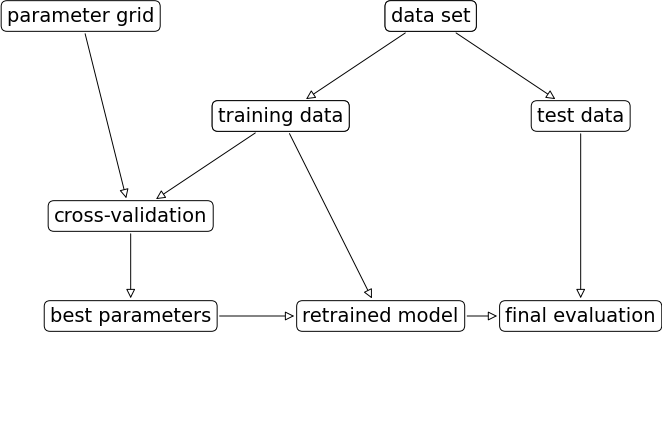

In [1]:
import mglearn
mglearn.plots.plot_grid_search_overview()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances. 

In scikit-learn, only *maximization* is implemented. Hence, we maximize the *negative* rms.

In [3]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms).
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    
    scores = cross_validate(model, X, y, cv=cv, 
                        scoring='neg_root_mean_squared_error',
                       return_train_score=True)

    return scores['train_score'].mean(), scores['test_score'].mean()

## 1. Load data
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Print the README of the concrete Dataset object. Load the Dataset object by using `return_dataset=True`.


In [4]:
from yellowbrick.datasets import load_concrete

data = load_concrete(return_dataset=True)
print(data.README)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

/Users/pauc/miniconda3/envs/ensf-ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### *Question 1:* What is the target variable name and units in this dataset?

*YOUR ANSWER HERE*

Conrete compressive strength in MPa.

### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`.

Print dimensions and type of `X`, `y`.

In [5]:
X, y = load_concrete()
print('X.shape={}, type(X)={}'.format(X.shape, type(X)))
print('y.shape={}, type(y)={}'.format(y.shape, type(y)))



X.shape=(1030, 8), type(X)=<class 'pandas.core.frame.DataFrame'>
y.shape=(1030,), type(y)=<class 'pandas.core.series.Series'>


## 2. Inspect the data 

### 2.1 Range of each feature
To get an idea of the range of features, print the minimum and maximum of each feature in `X`.

In [6]:
print('Feature ranges')
ranges=pd.concat([X.min(), X.max()],axis=1)
ranges.columns = ['min', 'max']
ranges

Feature ranges


,min,max
cement,102.00,540.0
slag,0.00,359.4
ash,0.00,200.1
water,121.75,247.0
splast,0.00,32.2
coarse,801.00,1145.0
fine,594.00,992.6
age,1.00,365.0


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges.

Add y-axis label indicating units, and a title.

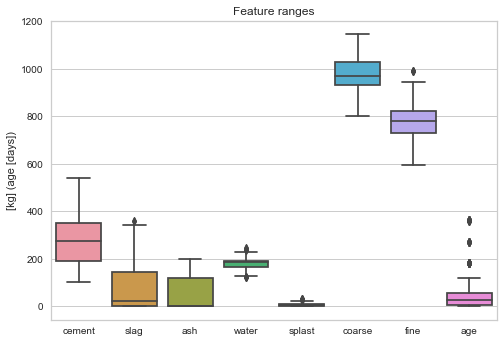

In [7]:
sns.boxplot(data=X)
plt.ylabel('[kg] (age [days])')
plt.title('Feature ranges');

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

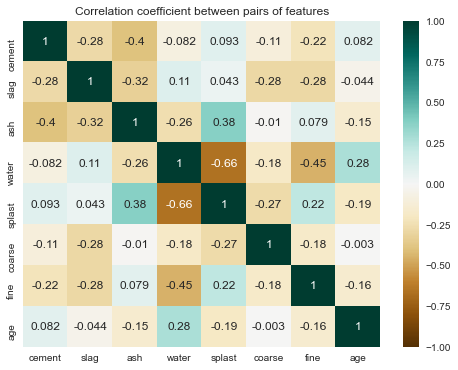

In [8]:
cor = X.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cor, vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.title('Correlation coefficient between pairs of features');

### 2.5 Histogram of target variable 

It might be interesting to see how many examples of each target value we have available. The histogram of the target vector can visualize the distribution.

Using seaborn `distplot()`, plot the histogram of the target vector. Add a title.

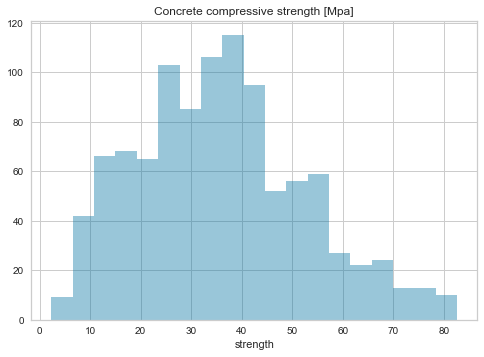

In [9]:
sns.distplot(y, kde=False)
plt.title('Concrete compressive strength [Mpa]');

## 3. Create training and test sets

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=37, 
                                                    test_size=0.2)

## 4. Compare models using cross-validation

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list, compute the negative root mean-squared error using the `get_regressor_neg_rms()` function, and print the training and validation scores with **2 decimal places**. Use 7-fold cross-validation.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

models = [LinearRegression(),
        RandomForestRegressor(random_state=64), 
         GradientBoostingRegressor(random_state=79)]

for model in models:
    train, val = get_regressor_neg_rms(model, X_train, y_train, cv=7)
    print("{} train_score={:.2f}, validation_score={:.2f}".format(model.__class__.__name__,
                                                                                train,
                                                                                val))


LinearRegression train_score=-10.29, validation_score=-10.39
RandomForestRegressor train_score=-2.12, validation_score=-4.98
GradientBoostingRegressor train_score=-3.69, validation_score=-4.98


### *Question 3:* For each of the three models, state if models are potentially over- or underfitting and why.

*YOUR ANSWER HERE*  
LinearRegression: underfitting (high bias) train and validation scores are close and far from optimum.

RandomForestRegressor: more likely overfitting (high variance) there is a difference between training and validation scores.

GradientBoostingRegressor: more likely overfitting (high variance) there is a difference between training and validation scores.


## 5. Hyperparameter tuning using grid search 

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### 5.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [ 11, 13, 15, 17]`
- `'max_features': ['auto', 'log2', None]`


In [12]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)
from sklearn.model_selection import GridSearchCV

model=RandomForestRegressor(random_state=64)

param_grid = {'n_estimators': [100, 200, 500],
             'max_depth': [ 11, 13, 15, 17],
             'max_features': ['auto', 'log2', None]}

grid_rf = GridSearchCV(model, param_grid, cv=7, n_jobs=4, scoring='neg_root_mean_squared_error')

In [13]:
# TODO: perform the grid search by calling fit()
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestRegressor(random_state=64), n_jobs=4,
             param_grid={'max_depth': [11, 13, 15, 17],
                         'max_features': ['auto', 'log2', None],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [14]:
# TODO: Print the best parameters
grid_rf.best_params_

{'max_depth': 13, 'max_features': 'log2', 'n_estimators': 200}

In [15]:
# TODO: Print the best score
grid_rf.best_score_

-4.879066183696317

### 5.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [16]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)
model_gb=GradientBoostingRegressor(random_state=79)

param_grid_gb = {'n_estimators': [100, 200, 500],
             'max_depth': [1, 3, 5, 7],
             'learning_rate': [0.01, 0.1, 1.0]}

grid_gb = GridSearchCV(model_gb, param_grid_gb, cv=7, n_jobs=4, scoring='neg_root_mean_squared_error')

In [17]:
# TODO: perform the grid search by calling fit()
grid_gb.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(random_state=79),
             n_jobs=4,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [100, 200, 500]},
             scoring='neg_root_mean_squared_error')

In [18]:
# TODO: Print the best parameters
grid_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

In [19]:
# TODO: Print the best score
grid_gb.best_score_

-4.207706497971644

### *Question 4:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*

`RandomForestRegressor(random_state=64)` neg rms = -4.88 MPa

`GradientBoostingRegressor(random_state=79)` neg rms = -4.15 MPa

=> GradientBoostingRegressor performs better with neg rms = -4.15 MPa

## 6. Retrain best model

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [20]:
#TODO: retrain the best estimator

model = grid_gb.best_estimator_
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500, random_state=79)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and R-squared

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [21]:
# TODO: print rms and r-squared for training and test set

from sklearn.metrics import mean_squared_error
train_rms = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
train_r2 = model.score(X_train, y_train)

test_rms = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
test_r2 = model.score(X_test, y_test)

print("train_rms = {:.2f} MPa (R2={:.3f})".format(train_rms, train_r2))
print("test_rms = {:.2f} MPa (R2={:.3f})".format(test_rms, test_r2))

train_rms = 2.07 MPa (R2=0.985)
test_rms = 4.51 MPa (R2=0.925)


### *Question 5:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models?

*YOUR ANSWER HERE*
- Polynomial regression: training RMS=3.96 MPa 􏰀(R2 = 0.890); testing RMS=8.82 MPa (􏰀R2 = 0.791)􏰁 

We are better, because our test rms is lower at 4.51 MPa.

- Neural network: training RMS=3.01 MPa (􏰀R2 = 0.940);􏰁 testing RMS=4.32 MPa 􏰀(R2 = 0.929)

We almost match the testing score, our rms is only slightly higher 4.51 MPa. But no, the neural network is better than our model.

### 7.2 Predicted vs actual strength plot
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line.

Add x-axis, y-axis labels including units, and a title.


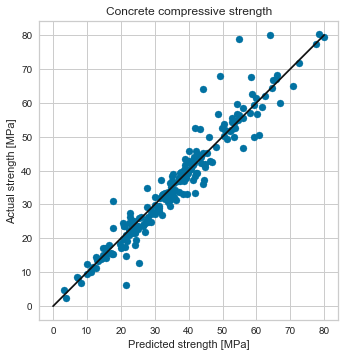

In [22]:
#TODO: predicted-actual plot
plt.scatter(model.predict(X_test), y_test)
plt.plot([0, 80], [0, 80], 'k')
plt.axis('square')
plt.xlabel('Predicted strength [MPa]')
plt.ylabel('Actual strength [MPa]')
plt.title('Concrete compressive strength');

### *Question 5:* For which two actual strength values (approximately) do we make the largest mistakes?

*YOUR ANSWER HERE*

Both values with large errors are actual strength values around 80 MPa.

### 7.3 Residual plot
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

Add x-axis, y-axis labels including units, and a title.



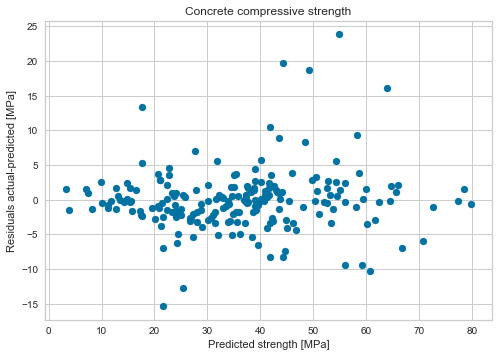

In [23]:
# TODO: Residual plot
plt.scatter(model.predict(X_test), y_test - model.predict(X_test))
plt.xlabel('Predicted strength [MPa]')
plt.ylabel('Residuals actual-predicted [MPa]')
plt.title('Concrete compressive strength');

## 8. Conclusion

In conclusion, comment on the following items:
- Did we find a model that outperformes the polynomial regression reported in the reference article? Explain.
- Did we find a model that outperformes the neural network reported in the reference article? Explain.
- What was the assumption about the dataset and the reference article? How does this affect your conclusions?


*YOUR ANSWER HERE*

- We do outperform polynomial regression: poly-reg test rms=8.82 MPa, our test rms=4.51 MPa is lower.
- We do **not** outperform neural network: nerual-net test rms=8.32 MPa, our test rms=4.51 MPa is slightly higer.
- We do not know if this dataset was used in the reference article. More importantly, we do not know which samples were part of the training and test set. We know that choosing a different training/test set would change the results. We could potentially be better than the reference or worse. Overall, our result is good and was easy to achieve.

## 9. Reflection



*YOUR ANSWER HERE*